In [1]:
import vcfpy
import pandas as pd
import sqlite3
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reader = vcfpy.Reader.from_path("annotated_snps.vcf")
header_snp = ['snp', 'chrom', 'pos', 'quality', 'ref', 'alt']

In [3]:
records=[]
for record in reader:
    if not record.is_snv():
        continue
    di={}
    di[header_snp[0]]=record.CHROM+":"+str(record.POS)+":"+record.REF+":"+record.ALT[0].value
    di[header_snp[1]]=record.CHROM
    di[header_snp[2]]=record.POS
    di[header_snp[3]]=record.QUAL
    di[header_snp[4]]=record.REF
    di[header_snp[5]]=record.ALT[0].value
    records.append(di)
data_snp=pd.DataFrame(records)
reader.close()
data_snp

,snp,chrom,pos,quality,ref,alt
0,chr9:127578816:C:T,chr9,127578816,36.1174,C,T
1,chr9:127578974:A:G,chr9,127578974,422.7380,A,G
2,chr9:127579080:A:G,chr9,127579080,172.0220,A,G
3,chr9:127663498:C:T,chr9,127663498,66.0472,C,T
4,chr9:127674824:G:T,chr9,127674824,24.6981,G,T
...,...,...,...,...,...,...
3315,chr9:138206800:C:T,chr9,138206800,33.0489,C,T
3316,chr9:138215336:T:C,chr9,138215336,52.0470,T,C
3317,chr9:138243732:A:G,chr9,138243732,145.8260,A,G
3318,chr9:138249280:G:C,chr9,138249280,125.8560,G,C


In [4]:
reader = vcfpy.Reader.from_path("annotated_snps.vcf")
header_snpcall = ['snp', 'sample', 'genotype']

In [5]:
samples = reader.header.samples.names
records=[]
for record in reader:
    if not record.is_snv():
        continue
    for call in record.calls:
        di={}
        di[header_snpcall[0]]=record.CHROM+":"+str(record.POS)+":"+record.REF+":"+record.ALT[0].value
        di[header_snpcall[1]]=re.search(r'\/\w+\.', call.sample).group()[1:-1]
        di[header_snpcall[2]]=str(call.gt_type) or "."
        records.append(di)
data_snpcall=pd.DataFrame(records)
reader.close()
data_snpcall

,snp,sample,genotype
0,chr9:127578816:C:T,TLE66_N,1
1,chr9:127578816:C:T,TLE66_T,1
2,chr9:127578974:A:G,TLE66_N,1
3,chr9:127578974:A:G,TLE66_T,1
4,chr9:127579080:A:G,TLE66_N,1
...,...,...,...
6635,chr9:138243732:A:G,TLE66_T,1
6636,chr9:138249280:G:C,TLE66_N,1
6637,chr9:138249280:G:C,TLE66_T,1
6638,chr9:138249462:C:T,TLE66_N,0


In [6]:
reader = vcfpy.Reader.from_path("annotated_snps.vcf")
header_snpeffect = "snp | Allele | Annotation | Annotation_Impact | Gene_Name | Gene_ID | Feature_Type | Feature_ID | Transcript_BioType | Rank | HGVS.c | HGVS.p | cDNA.pos / cDNA.length | CDS.pos / CDS.length | AA.pos / AA.length | Distance | ERRORS / WARNINGS / INFO"
header_snpeffect = header_snpeffect.lower().split(' | ')

In [7]:
records=[]
for record in reader:
    if not record.is_snv():
        continue
    for line in record.INFO['ANN']:
        di={}
        di[header_snpeffect[0]]=record.CHROM+":"+str(record.POS)+":"+record.REF+":"+record.ALT[0].value
        annotation=line.split('|')
        for i in range(len(annotation)):
            di[header_snpeffect[i+1]]=annotation[i]
        records.append(di)
data_snpeffect=pd.DataFrame(records)
reader.close()
data_snpeffect

,snp,allele,annotation,annotation_impact,gene_name,gene_id,feature_type,feature_id,transcript_biotype,rank,hgvs.c,hgvs.p,cdna.pos / cdna.length,cds.pos / cds.length,aa.pos / aa.length,distance,errors / warnings / info
0,chr9:127578816:C:T,T,upstream_gene_variant,MODIFIER,STXBP1,ENSG00000136854,transcript,ENST00000637521.2,protein_coding,,c.-724C>T,,,,,554,
1,chr9:127578816:C:T,T,intron_variant,MODIFIER,NIBAN2,ENSG00000136830,transcript,ENST00000373314.7,protein_coding,1/13,c.16+106G>A,,,,,,
2,chr9:127578974:A:G,G,5_prime_UTR_variant,MODIFIER,NIBAN2,ENSG00000136830,transcript,ENST00000373314.7,protein_coding,1/14,c.-37T>C,,,,,37,
3,chr9:127578974:A:G,G,upstream_gene_variant,MODIFIER,STXBP1,ENSG00000136854,transcript,ENST00000637521.2,protein_coding,,c.-566A>G,,,,,396,
4,chr9:127579080:A:G,G,upstream_gene_variant,MODIFIER,NIBAN2,ENSG00000136830,transcript,ENST00000373314.7,protein_coding,,c.-143T>C,,,,,91,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,chr9:138243732:A:G,G,downstream_gene_variant,MODIFIER,FAM157B,ENSG00000233013,transcript,ENST00000540522.6,processed_transcript,,n.*10A>G,,,,,10,
18489,chr9:138249280:G:C,C,intron_variant,MODIFIER,FAM157B,ENSG00000233013,transcript,ENST00000446912.3,processed_transcript,6/8,n.1365-35G>C,,,,,,
18490,chr9:138249280:G:C,C,intron_variant,MODIFIER,FAM157B,ENSG00000233013,transcript,ENST00000639350.1,transcribed_unprocessed_pseudogene,1/3,n.111-35G>C,,,,,,
18491,chr9:138249462:C:T,T,intron_variant,MODIFIER,FAM157B,ENSG00000233013,transcript,ENST00000446912.3,processed_transcript,7/8,n.1430+82C>T,,,,,,


In [8]:
db = sqlite3.connect('snp.sqlite')
data_snp.to_sql('snp', db, if_exists='replace', index=False)
data_snpcall.to_sql('snp_call', db, if_exists='replace', index=False)
data_snpeffect.to_sql('snp_effect', db, if_exists='replace', index=False)

18493

In [9]:
sql="""
    select snpe.gene_name, count(snpe.gene_name) as count, snpe.annotation_impact
    from snp_effect snpe
    where snpe.annotation_impact == "HIGH"
    group by gene_name
    union all
    select snpe.gene_name, count(snpe.gene_name) as count, snpe.annotation_impact
    from snp_effect snpe
    where snpe.annotation_impact == "MODERATE"
    group by gene_name
    union all
    select snpe.gene_name, count(snpe.gene_name) as count, snpe.annotation_impact
    from snp_effect snpe
    where snpe.annotation_impact == "LOW"
    group by gene_name
    union all
    select snpe.gene_name, count(snpe.gene_name) as count, snpe.annotation_impact
    from snp_effect snpe
    where snpe.annotation_impact == "MODIFIER"
    group by gene_name
    """

In [10]:
transcripts_pergene_perimpact = pd.read_sql(sql, db)
transcripts_pergene_perimpact

,gene_name,count,annotation_impact
0,CACNA1B,6,HIGH
1,FAM166A,3,HIGH
2,SPTAN1,1,HIGH
3,ABCA2,4,MODERATE
4,ADAMTS13,12,MODERATE
...,...,...,...
684,ZDHHC12,20,MODIFIER
685,ZER1,14,MODIFIER
686,ZER1-TBC1D13,1,MODIFIER
687,ZMYND19,20,MODIFIER


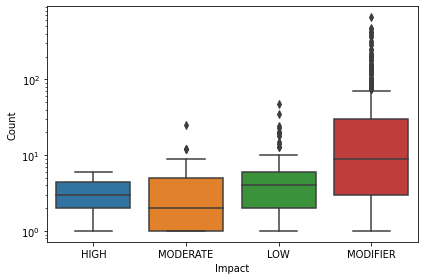

In [11]:
ax = sns.boxplot(x="annotation_impact", y="count", data=transcripts_pergene_perimpact)
plt.xlabel("Impact")
plt.ylabel("Count")
ax.set_yscale('log')
plt.tight_layout()
plt.savefig("TransscriptsPerImpact.svg")

In [12]:
sql2 =  """
        select snpe.annotation, count(snpe.annotation) as frequency, snpc.sample
        from snp_effect snpe, snp_call snpc
        where snpe.snp == snpc.snp
        and snpc.sample == "TLE66_N"
        and snpc.genotype in ('1', '2')
        group by snpe.annotation
        union all
        select snpe.annotation, count(snpe.annotation) as frequency, snpc.sample
        from snp_effect snpe, snp_call snpc
        where snpe.snp == snpc.snp
        and snpc.sample == "TLE66_T"
        and snpc.genotype in ('1', '2')
        group by snpe.annotation
        """

In [13]:
annofreq_persample = pd.read_sql(sql2, db)
tumortypes = annofreq_persample.loc[annofreq_persample["sample"] == "TLE66_N"]["annotation"]
normaltypes = annofreq_persample.loc[annofreq_persample["sample"] == "TLE66_T"]["annotation"]
tumort_notin_normalt = tumortypes[~tumortypes.isin(normaltypes)]
normalt_notin_tumort = normaltypes[~normaltypes.isin(tumortypes)]
for ann in tumort_notin_normalt:
    annofreq_persample.loc[annofreq_persample.shape[0]]=[ann, 0, "TLE66_T"]
for ann in normalt_notin_tumort:
    annofreq_persample.loc[annofreq_persample.shape[0]]=[ann, 0, "TLE66_N"]
annofreq_persample = annofreq_persample.sort_values(["sample","annotation"])
annofreq_persample

,annotation,frequency,sample
0,3_prime_UTR_variant,315,TLE66_N
1,5_prime_UTR_premature_start_codon_gain_variant,16,TLE66_N
2,5_prime_UTR_variant,60,TLE66_N
3,downstream_gene_variant,3093,TLE66_N
4,intergenic_region,636,TLE66_N
5,intron_variant,7285,TLE66_N
6,missense_variant,238,TLE66_N
7,missense_variant&splice_region_variant,7,TLE66_N
8,non_coding_transcript_exon_variant,723,TLE66_N
9,splice_acceptor_variant&intron_variant,1,TLE66_N


In [14]:
doubles=[]
for i in range(annofreq_persample.shape[0]):
    name = annofreq_persample["annotation"][i]
    sample = annofreq_persample["sample"][i]
    surplus = annofreq_persample["frequency"][i]
    name_split = name.split("&")
    if len(name_split) > 1:
        doubles.append(i)
        for cat in name_split:
            annofreq_persample["frequency"][(annofreq_persample["annotation"] == cat) * 
                                            (annofreq_persample["sample"] == sample)] += surplus
annofreq_persample = annofreq_persample.drop(index=doubles)
annofreq_persample

/tmp/d6abe5582a/ipykernel_31416/599290894.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annofreq_persample["frequency"][(annofreq_persample["annotation"] == cat) *


,annotation,frequency,sample
0,3_prime_UTR_variant,315,TLE66_N
1,5_prime_UTR_premature_start_codon_gain_variant,16,TLE66_N
2,5_prime_UTR_variant,60,TLE66_N
3,downstream_gene_variant,3093,TLE66_N
4,intergenic_region,636,TLE66_N
5,intron_variant,7378,TLE66_N
6,missense_variant,245,TLE66_N
8,non_coding_transcript_exon_variant,732,TLE66_N
33,stop_gained,0,TLE66_N
14,synonymous_variant,495,TLE66_N


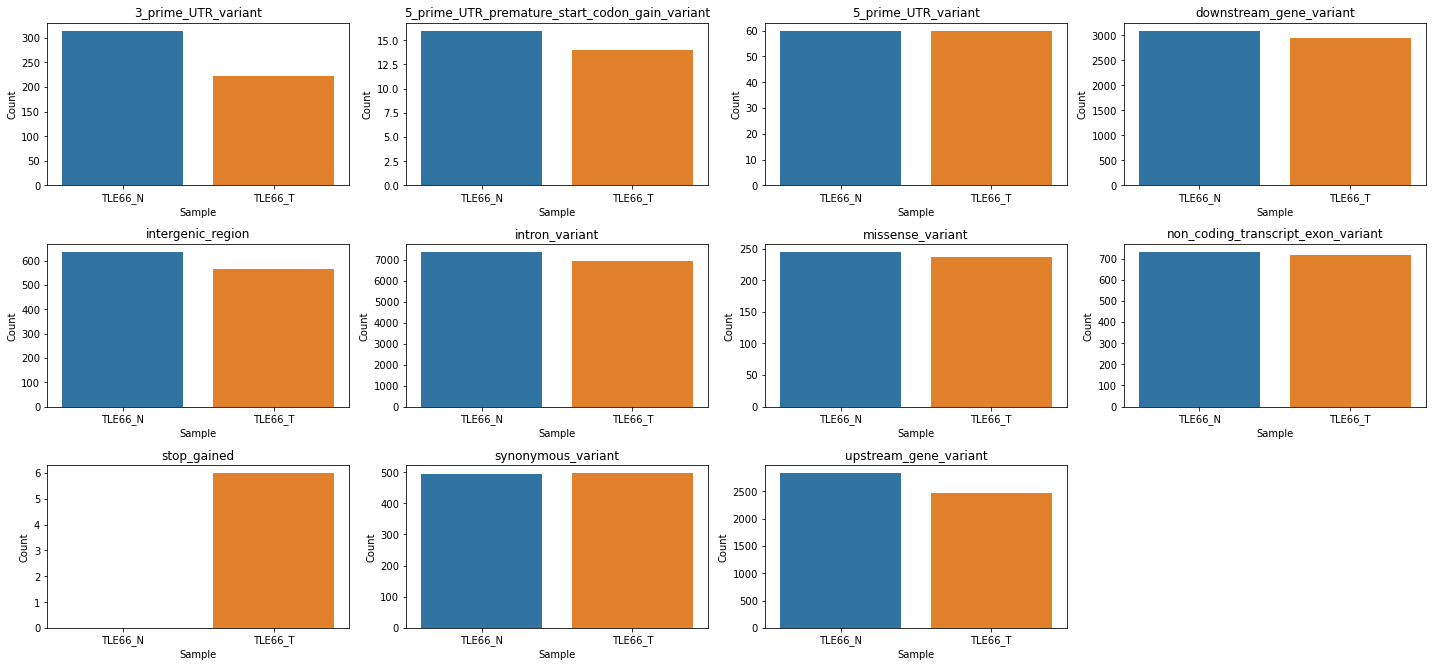

In [15]:
names = annofreq_persample["annotation"].unique()
dim = int(np.ceil(np.sqrt(len(names))))
size = (20,12)
fig, axes = plt.subplots(dim, dim, figsize=size)
for i in range(dim**2):
    ax = axes[i//dim][i % dim]
    if i < len(names):
        sns.barplot(x="sample", y="frequency", 
                    data=annofreq_persample.loc[annofreq_persample["annotation"]==names[i]], 
                    ax = ax)
        ax.set_xlabel("Sample")
        ax.set_ylabel("Count")
        ax.set_title(names[i])
    else:
        ax.set_visible(False)
fig.tight_layout()
fig.savefig("FrequenciesPerAnnotation.svg")